F_onewayResult(statistic=np.float64(8.03730248114399), pvalue=np.float64(0.0001524972289522953))


C:\Users\nadys\AppData\Local\Temp\ipykernel_11548\3460827330.py:19: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  plt.errorbar(x=name, y=means, yerr=sems,


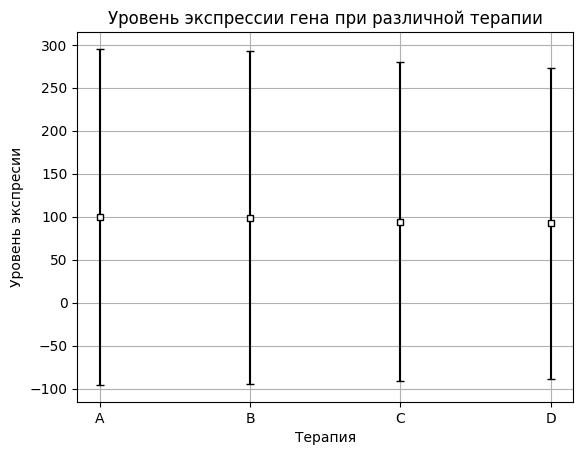

In [2]:
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

URL = 'https://stepik.org/media/attachments/lesson/8083/genetherapy.csv'
data = pd.read_csv(URL)
A = data[data["Therapy"] == "A"]["expr"]
B = data[data["Therapy"] == "B"]["expr"]
C = data[data["Therapy"] == "C"]["expr"]
D = data[data["Therapy"] == "D"]["expr"]
print(stats.f_oneway(A, B, C, D))

means = [x for x in data.groupby(by='Therapy').mean().expr.values] # список средних значений
sems = [x*1.96 for x in data.groupby(by='Therapy').mean().expr.values] # список se*1.96 для формирования доверительных интервалов

name = ['A', 'B', 'C', 'D']

plt.errorbar(x=name, y=means, yerr=sems,
             ecolor='black', capsize=3, marker='s', markersize=4,
             mfc='white', mec='black', fmt='o')
plt.title('Уровень экспрессии гена при различной терапии')
plt.grid()
plt.xlabel('Терапия')
plt.ylabel('Уровень экспресии')
plt.show()


In [7]:
# Тест Тьюки для попарного сравнения всех групп между собой

from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey = pairwise_tukeyhsd(endog=data['expr'], groups=data['Therapy'], alpha=0.05)
print(tukey)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
     A      B  -0.9333 0.9514  -5.5959  3.7292  False
     A      C  -5.3333 0.0189  -9.9959 -0.6708   True
     A      D     -7.4 0.0005 -12.0626 -2.7374   True
     B      C     -4.4  0.071  -9.0626  0.2626  False
     B      D  -6.4667 0.0029 -11.1292 -1.8041   True
     C      D  -2.0667 0.6458  -6.7292  2.5959  False
-----------------------------------------------------


In [10]:
stats.levene(data.A, data.B, data.C, data.D)

AttributeError: 'DataFrame' object has no attribute 'A'